In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
import seaborn as sns
import seaborn.objects as so

In [25]:
#Natacha Robbins Hypothesis
#Is there a significant difference in Rating by Types or Effects (effect_1)? 
#Use data to get the Rating by Type and the effect to see if they are consistent. 
#Do users feel different effects when they use the same type of cannabis(yes)?
#What is the average(mean) Rating reported by Type and Effect.


In [26]:
#Display Data from Dataframe.

Original_Data = pd.read_csv("new_cannabis_data.csv",encoding ='latin-1')
Original_Data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'new_cannabis_data.csv'

In [27]:
#Split the effects in DataFrame from the , to use Effect_1 in the analysis.
Original_Data.Effects.str.split(",",expand=True)

,0,1,2,3,4
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2346,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [5]:
#Renamed the columns to effect_1, effect_2, effect_3, effect_4, effect_5.
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["effect_1", "effect_2", "effect_3", "effect_4", "effect_5"]
effects.head(4)

,effect_1,effect_2,effect_3,effect_4,effect_5
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative


In [6]:
#Add the effects into the Original DataFrame.
pd.concat([Original_Data, effects], axis=1)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",A Greener Today's Dankczar,NaN,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",3rd Gen Family and Terp Hogz,NaN,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy_Herbal",Ripper Seeds,NaN,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",NaN,NaN,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [7]:
#Create the second DataFrame from Original DataFrame
OD2=pd.concat([Original_Data, effects], axis=1)
OD2.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Explore the DataFrame
#Count of Strain, Type, and Rating
OD2["num_effects"]=OD2.Effects.str.count(",")+1
OD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2264 non-null   object 
 4   Flavor       2195 non-null   object 
 5   Breeders     1165 non-null   object 
 6   LOCATION     614 non-null    object 
 7   effect_1     2264 non-null   object 
 8   effect_2     2254 non-null   object 
 9   effect_3     2239 non-null   object 
 10  effect_4     2212 non-null   object 
 11  effect_5     2180 non-null   object 
 12  num_effects  2264 non-null   float64
dtypes: float64(2), object(11)
memory usage: 238.9+ KB


In [17]:
#Count of effects for effect_1
OD2["effect_1"].value_counts()


effect_1
Relaxed      825
Happy        476
Euphoric     249
Uplifted     244
Sleepy        89
Creative      80
Energetic     74
Talkative     55
Focused       53
Aroused       38
Hungry        36
Tingly        32
Giggly        12
Dry            1
Name: count, dtype: int64

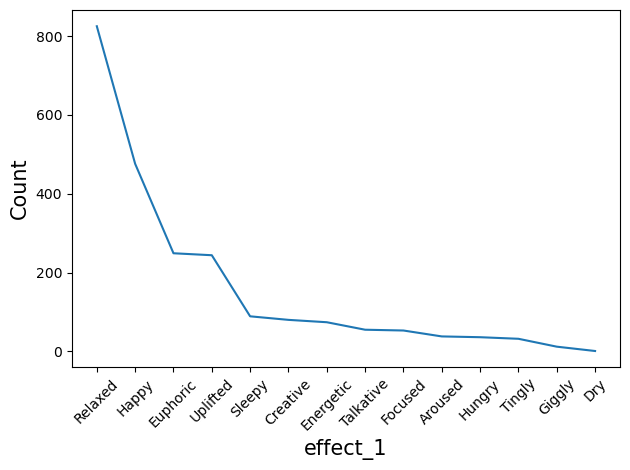

In [23]:
#Visualization of effect_1 by count
plt.plot(OD2["effect_1"].value_counts())
plt.xlabel("EFFECT_1", fontsize=15)
plt.ylabel("COUNT", fontsize=15)
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()


In [19]:
#Count of Rating by effect_1
OD2["Rating"].value_counts()
print(OD2["Rating"].describe())

count    2351.000000
mean        4.310634
std         0.836394
min         0.000000
25%         4.200000
50%         4.400000
75%         4.700000
max         5.000000
Name: Rating, dtype: float64


In [20]:
#plt.hist(OD2["Rating"].value_counts())
#plt.xlabel("Rating")
#plt.ylabel("count")
#plt.show()

#print(OD2["Rating"].describe())

In [225]:
#Find total Value for each Type 
OD3.Type.value_counts()

print(OD2["Type"].describe())

count       2351
unique         3
top       hybrid
freq        1212
Name: Type, dtype: object


In [226]:
#Find average Rating for each Type
#What is the average(mean) Rating reported by Type?
OD3.groupby("Type").Rating.mean()

print(OD3.groupby("Type").describe())

       Rating                                              num_effects       \
        count      mean       std  min  25%  50%  75%  max       count mean   
Type                                                                          
hybrid  236.0  4.398305  0.507892  0.0  4.2  4.4  4.7  5.0       236.0  5.0   
indica  157.0  4.455414  0.292074  3.7  4.3  4.5  4.6  5.0       157.0  5.0   
sativa  108.0  4.435185  0.312157  3.5  4.3  4.4  4.6  5.0       108.0  5.0   

        ...           num_flavors                                               
        ...  75%  max       count      mean       std  min  25%  50%  75%  max  
Type    ...                                                                     
hybrid  ...  5.0  5.0       236.0  3.008475  0.091861  3.0  3.0  3.0  3.0  4.0  
indica  ...  5.0  5.0       157.0  3.031847  0.176155  3.0  3.0  3.0  3.0  4.0  
sativa  ...  5.0  5.0       108.0  3.009259  0.096225  3.0  3.0  3.0  3.0  4.0  

[3 rows x 24 columns]


In [177]:
#Find average rating for each effect_1
#What is the average(mean) Rating reported by Effect?
OD3.groupby("effect_1").Rating.mean()

print(OD3.groupby("effect_1").describe())

          Rating                                                    \
           count      mean       std  min    25%   50%    75%  max   
effect_1                                                             
Aroused      9.0  4.733333  0.438748  3.7  4.700  5.00  5.000  5.0   
Creative    13.0  4.530769  0.275029  4.0  4.500  4.60  4.600  5.0   
Energetic   10.0  4.360000  0.333999  3.9  4.100  4.35  4.575  5.0   
Euphoric    70.0  4.430000  0.324975  3.7  4.200  4.40  4.700  5.0   
Focused     12.0  4.241667  0.450168  3.5  3.950  4.35  4.475  5.0   
Giggly       2.0  4.300000  0.424264  4.0  4.150  4.30  4.450  4.6   
Happy      102.0  4.448039  0.272404  3.8  4.300  4.40  4.600  5.0   
Hungry       4.0  3.075000  2.061351  0.0  2.925  3.95  4.100  4.4   
Relaxed    195.0  4.446667  0.262868  3.7  4.300  4.50  4.600  5.0   
Sleepy      13.0  4.407692  0.269139  4.0  4.300  4.50  4.500  5.0   
Talkative   10.0  3.910000  1.473808  0.0  3.925  4.30  4.775  5.0   
Tingly       4.0  4.

/var/folders/qd/nz_sk6297w3d7v1mk0dm7jp80000gn/T/ipykernel_14469/1312133176.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, '-ok', color='green');


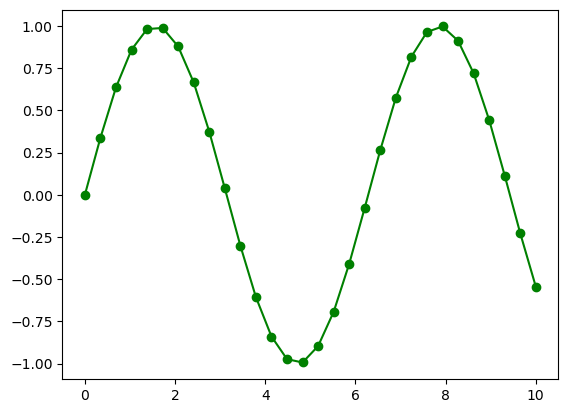

In [178]:
#plt.scatter(OD3.groupby("effect_1").Rating.mean())
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '-ok', color='green');

In [116]:
#Count for each effect for effect_1 by Type
OD3.groupby(["Type", "effect_1"]).size()

Type    effect_1 
hybrid  Aroused        4
        Creative       6
        Energetic      4
        Euphoric      34
        Focused        7
        Happy         63
        Hungry         2
        Relaxed       74
        Sleepy         2
        Talkative      7
        Tingly         4
        Uplifted      29
indica  Aroused        2
        Creative       2
        Euphoric      15
        Focused        1
        Giggly         1
        Happy          8
        Hungry         1
        Relaxed      112
        Sleepy        10
        Talkative      1
        Uplifted       4
sativa  Aroused        3
        Creative       5
        Energetic      6
        Euphoric      21
        Focused        4
        Giggly         1
        Happy         31
        Hungry         1
        Relaxed        9
        Sleepy         1
        Talkative      2
        Uplifted      24
dtype: int64

In [65]:
#COUNT FOR EACH EFFECT FOR EFFECT5 BY TYPE
#OD3.groupby(["Type", "effect_5"]).size()

In [79]:
#Hybrid dataframe Robbins
#Pull Hybrid Type from DF
hybrid_df = OD3.groupby(["Type", "effect_1", "Rating"]).size()
hybrid_2_df=pd.DataFrame(hybrid_df)
hybrid_2_df.head()

0
Type   effect_1 Rating   
hybrid Aroused  4.8     1
                5.0     3
       Creative 4.0     1
                4.5     1
                4.6     2

In [129]:
final=hybrid_2_df.loc["hybrid"]
final.head(5)


0
effect_1 Rating   
Aroused  4.8     1
         5.0     3
Creative 4.0     1
         4.5     1
         4.6     2

In [124]:
final=hybrid_2_df.loc["indica"]
final.head(5)


0
effect_1 Rating   
Aroused  3.7     1
         5.0     1
Creative 4.2     1
         5.0     1
Euphoric 3.7     2

In [125]:
final=hybrid_2_df.loc["sativa"]
final.head(5)


0
effect_1 Rating   
Aroused  4.4     1
         4.7     1
         5.0     1
Creative 4.2     1
         4.5     2

In [83]:
#Is there a significant difference in Rating by Types or Effects(effect_1) 
#Place all “Type” in a Table(columns) with all five(5) effects to review the “Rating” for each
cols=["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5","Rating"]
OD3[cols].head()


,Type,effect_1,effect_2,effect_3,effect_4,effect_5,Rating
0,sativa,Uplifted,Happy,Relaxed,Energetic,Creative,4.4
2,hybrid,Tingly,Creative,Hungry,Relaxed,Uplifted,4.2
10,hybrid,Relaxed,Euphoric,Sleepy,Happy,Talkative,4.5
11,indica,Relaxed,Focused,Euphoric,Uplifted,Aroused,4.4
13,indica,Relaxed,Uplifted,Happy,Creative,Euphoric,4.3


In [92]:
#Same command as above but pull with: .size()

OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5","Rating"]).min()


Strain  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                       
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0           Silver-Calyx   
                Euphoric  Focused   Happy     Hungry    5.0                 Chicle   
                Tingly    Uplifted  Euphoric  Focused   4.8          Savants-Grail   
                Uplifted  Energetic Sleepy    Tingly    5.0          Peles-Fire-Og   
       Creative Energetic Happy     Aroused   Uplifted  4.9          Morning-Glory   
...                                                                            ...   
sativa Uplifted Happy     Relaxed   Talkative Energetic 4.6             Royal-Haze   
                          Talkative Energetic Euphoric  5.0         Sour-Star-Head   
                Relaxed   Energetic Euphoric  Focused   4.4     Sequoia-Strawberry   
                                    Happy     Focused   4.3              Hurricane   
                          Happy     Euphoric  Focused   4.6       Chocolate-Fondue   

                                                                                                    Effects  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                                                
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0      Aroused,Energetic,Euphoric,Focused,Relaxed   
                Euphoric  Focused   Happy     Hungry    5.0           Aroused,Euphoric,Focused,Happy,Hungry   
                Tingly    Uplifted  Euphoric  Focused   4.8        Aroused,Tingly,Uplifted,Euphoric,Focused   
                Uplifted  Energetic Sleepy    Tingly    5.0        Aroused,Uplifted,Energetic,Sleepy,Tingly   
       Creative Energetic Happy     Aroused   Uplifted  4.9       Creative,Energetic,Happy,Aroused,Uplifted   
...                                                                                                     ...   
sativa Uplifted Happy     Relaxed   Talkative Energetic 4.6      Uplifted,Happy,Relaxed,Talkative,Energetic   
                          Talkative Energetic Euphoric  5.0     Uplifted,Happy,Talkative,Energetic,Euphoric   
                Relaxed   Energetic Euphoric  Focused   4.4     Uplifted,Relaxed,Energetic,Euphoric,Focused   
                                    Happy     Focused   4.3        Uplifted,Relaxed,Energetic,Happy,Focused   
                          Happy     Euphoric  Focused   4.6         Uplifted,Relaxed,Happy,Euphoric,Focused   

                                                                                   Flavor  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                              
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0         Lemon,Tree,Fruit,Pine   
                Euphoric  Focused   Happy     Hungry    5.0           Ammonia,Diesel,Mint   
                Tingly    Uplifted  Euphoric  Focused   4.8          Sweet,Flowery,Earthy   
                Uplifted  Energetic Sleepy    Tingly    5.0         Diesel,Earthy,Pungent   
       Creative Energetic Happy     Aroused   Uplifted  4.9            Citrus,Pepper,Lime   
...                                                                                   ...   
sativa Uplifted Happy     Relaxed   Talkative Energetic 4.6         Citrus,Tropical,Skunk   
                          Talkative Energetic Euphoric  5.0     Citrus,Sweet,Spicy_Herbal   
                Relaxed   Energetic Euphoric  Focused   4.4         Strawberry,Sweet,Pine   
                                    Happy     Focused   4.3      Spicy_Herbal,Grape,Berry   
                          Happy     Euphoric  Focused   4.6           Sweet,Cheese,Earthy   

                                                                                                Breeders  \
Type   effect_1 effect_2  effect_3  effect_4  effect_5  Rating                                             
hybrid Aroused  Energetic Euphoric  Focused   Relaxed   5.0                            

In [98]:
#Use data to get the Rating by Type and the effect to see if they are consistent. 
#Request the “Rating” of each ‘Effect” by the max to find the Significant Difference by “Rating” of “Effect”
per_all_effect_rating = OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5"])
per_all_effect_rating = per_all_effect_rating["Rating"].max()
per_all_effect_rating


Type    effect_1  effect_2   effect_3   effect_4   effect_5 
hybrid  Aroused   Energetic  Euphoric   Focused    Relaxed      5.0
                  Euphoric   Focused    Happy      Hungry       5.0
                  Tingly     Uplifted   Euphoric   Focused      4.8
                  Uplifted   Energetic  Sleepy     Tingly       5.0
        Creative  Energetic  Happy      Aroused    Uplifted     4.9
                                                               ... 
sativa  Uplifted  Happy      Relaxed    Talkative  Energetic    4.6
                             Talkative  Energetic  Euphoric     5.0
                  Relaxed    Energetic  Euphoric   Focused      4.4
                                        Happy      Focused      4.3
                             Happy      Euphoric   Focused      4.6
Name: Rating, Length: 460, dtype: float64

In [130]:
#Request the “Rating” of each ‘Effect” by the min to find the Significant Difference by “Rating” of “Effect”
per_all_effect_rating = OD3.groupby(["Type", "effect_1","effect_2", "effect_3", "effect_4", "effect_5"])
per_all_effect_rating = per_all_effect_rating["Rating"].min()
per_all_effect_rating


Type    effect_1  effect_2   effect_3   effect_4   effect_5 
hybrid  Aroused   Energetic  Euphoric   Focused    Relaxed      5.0
                  Euphoric   Focused    Happy      Hungry       5.0
                  Tingly     Uplifted   Euphoric   Focused      4.8
                  Uplifted   Energetic  Sleepy     Tingly       5.0
        Creative  Energetic  Happy      Aroused    Uplifted     4.9
                                                               ... 
sativa  Uplifted  Happy      Relaxed    Talkative  Energetic    4.6
                             Talkative  Energetic  Euphoric     5.0
                  Relaxed    Energetic  Euphoric   Focused      4.4
                                        Happy      Focused      4.3
                             Happy      Euphoric   Focused      4.6
Name: Rating, Length: 460, dtype: float64

/var/folders/qd/nz_sk6297w3d7v1mk0dm7jp80000gn/T/ipykernel_14469/3337859430.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_plot_e1.set_yticklabels(box_plot_e1.get_yticklabels(), fontsize =10)


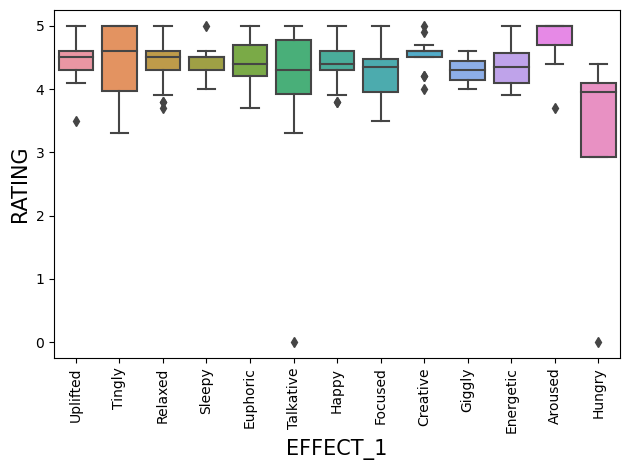

In [212]:
#Create a Box plot to see if Ratings vary depending on the effect (Using effect_1)
box_plot_e1=sns.boxplot(data=OD3, x="effect_1", y="Rating")
box_plot_e1.set_xticklabels(box_plot_e1.get_xticklabels(),rotation=90, fontsize =10)
box_plot_e1.set_yticklabels(box_plot_e1.get_yticklabels(), fontsize =10)
plt.xlabel("EFFECT_1", fontsize =15)
plt.ylabel("RATING", fontsize =15)
plt.tight_layout()

plt.show()

In [ ]:
#df3.to_csv("MaryJane_clean_data.csv", index=False)

In [ ]:
#plt.scatter(-------['Type'],----------['Rating'])
color_bar = plt.colorbar()
color_bar.set_label('effect_1')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()

In [ ]:
#Plot 
plt.hist(hybrid_2_df["Rating"])
plt.xlabel("effect_1")
plt.ylabel("Type")
plt.show()